# Лабораторная работа: обучение многообразий

# PCA

В этом блоке вам предстоит выполнить задания, касающиеся метода главных компонент (`PCA`).

## Теоретическая часть

Пусть на вход подаются центрированные данные
$$
x_i = \begin{pmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}
\end{pmatrix} \in \mathbb R^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum\limits_{i = 1}^n x_i = 0.
$$
Пусть также $X$ — матрица размера $n \times p$ — матрица объекты-признаки (внимание: объекты расположены в матрице $X$ по строкам), $W$ – матрица размера $p \times l$ из ортонормированных базисных векторов (их координаты записаны по столбцам) линейного подпространства $\mathbb R^l$ пространства $\mathbb R^p$, в которое мы хотим «вложить» исходные объекты, $Z$ — матрица размера $n \times l$ — матрица координат старых объектов в новом базисе. Мы определили функцию потерь ($l_2$-потери) следующим образом:

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2.
$$

На лекции мы обсудили построение первой главной компоненты, минимизируя выражение

$$
L(W) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}\|^2.
$$

При условии, что $w_1^Tw_1 = 1$, мы получили, что

$$
z_{i1} = x_i^Tw_1,
$$

то есть что новая координата есть проекция на $w_1$, и что $w_1$ — собственный вектор выборочной ковариационной матрицы

$$
\Sigma = \frac{1}{n}X^TX,
$$

отвечающей наибольшему собственному значению.



## Задача 1

Вам требуется построить первые две главные компоненты, объяснить сособ их получения, а также их геометрический и статистический смыслы. Для этого:

1.   Составьте минимизируемый функционал.
2.   Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.
3. Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно.
4. Покажите, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.

**Решение:** ###

## Задача 2

Предыдущий подход хорошо работает в случае, когда $n$ сильно больше $p$. В противном случае разумнее рассматривать тоже симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог `PCA`.

5. Показать численно (на конкретной матрице) с использованием, например, `numpy`.

**Решение:** ###

## Практическая часть

Рассмотрим применение `PCA` в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с `FashionMNIST`

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

(-0.5, 419.5, 279.5, -0.5)

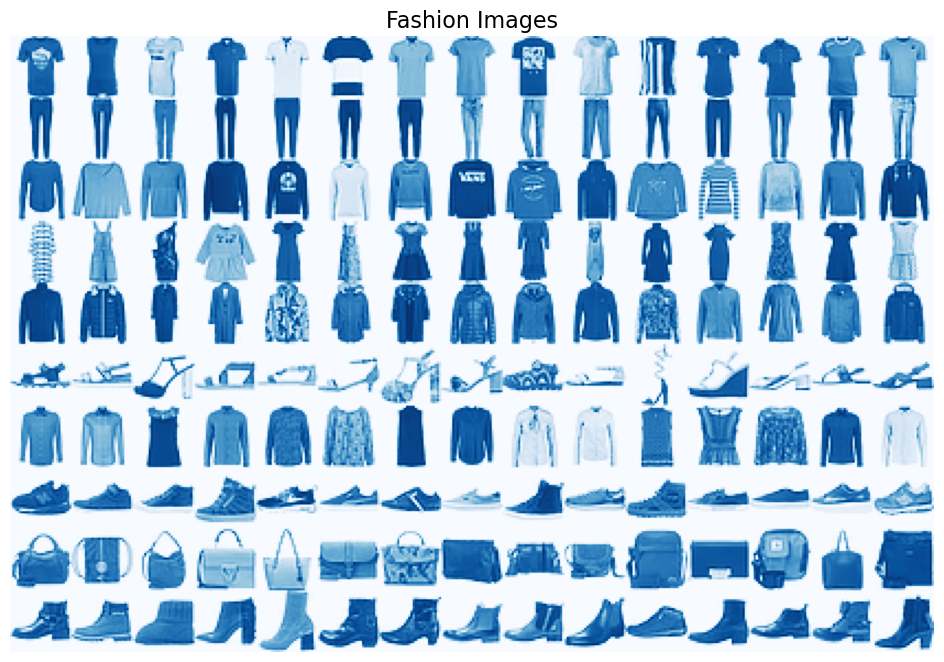

In [35]:
classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [36]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

При помощи `train_test_split` разбейте набор данных на тренировочную и тестовую части в соотношении `80:20`. Используйте стратификацию по колонке отклика.

**Примечание:** здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать `random_state`.

In [37]:
from sklearn.model_selection import train_test_split

random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=random_state,
    stratify=y
)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (8000, 784), Test size: (2000, 784)


Обучите модель `LogisticRegression` со следующими параметрами: `max_iter=2000, tol=0.001` на тренировочных данных. При помощи `f1_score` с параметром `average='weighted'` оцените модель на тестовых данных.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

clf = LogisticRegression(
    random_state=random_state,
    max_iter=2000,
    tol=0.001,
    n_jobs=-1
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
f1_clean = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score на чистых данных: {f1_clean:.4f}")

F1-score на чистых данных: 0.7468


/Users/pisarikmaksim/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Вопрос:** как работает `f1_score` и что показывает данная метрика? Опишите ее плюсы и минусы. Что означает параметр `average='weighted'`? Какие еще бывают параметры, зачем и когда они используются?

**Ваш ответ:** 

F1-score - это мера оценки качества моделей классификации, являющаяся гармоническим средним точности и полноты. Оно вычисляется по формуле:

$F_1 score = \frac{2TP}{2TP + FP + FN}$, где

$TP$ - истинно положительный результат,
$FP$ - ложно положительный результат,
$FN$ - ложно отрицательный результат.

Точноть вычисляется как $\frac{TP}{TP + FP}$ - доля верно определенных среди всех признанных положительными, полнота как $\frac{TP}{TP + FN}$ - доля верно определенных среди всех реально положительных.

Данная мера оценки полезна, когда мы хотим учесть и точность, и полноту без "перекоса" в сторону одной из них. Она объединяет обе характеристики, что позволяет удобно сравнивать модели между собой. Кроме того, она хорошо справляется с несбалансированными классами.

С другой стороны, в случаях, когда нам надо учитывать большую ценность точности или плотности, f1-score становиться менее эффективной метрикой сравнения. Кроме того, никак не учитываются истинно отрицательные результаты.

Применяемые параметры:

1. 'binary'. Используется по умолчанию. Применим только для систем двух классов.

2. 'micro'. Считает глобальную материку по всем классам: суммируются TP, FP, FN для всех классов и строиться общее значение f1-score. Используется, когда нам необходимо общая метрика для предсказаний в целом, не отдельно по классам.

3. 'macro'. Считает f1-score для каждого класса отдельно и возвращает среднее значение. Используется, когда все классы важны и нас интересуетт среднее их метрик.

4. 'weighted'. Считает f1-score для каждого класса отдельно и возвращает взвешенное среднее значение (в качестве веса выступает число объектов в классе). Используется, когда классы ожидаются несбалансированными и нас интересует общее значение с учетом размера классов.

5. 'samples'. Считает f1-score для каждого объекта отдельно и возвращает среднее значение. Используется, когда один объект может иметь метки нескольких классов.

Добавьте к тестовым данным шум при помощи `np.random.normal(X_test, scale)`, где `scale` $\in \{50,100,150,200\}$. Визуально оцените результаты.

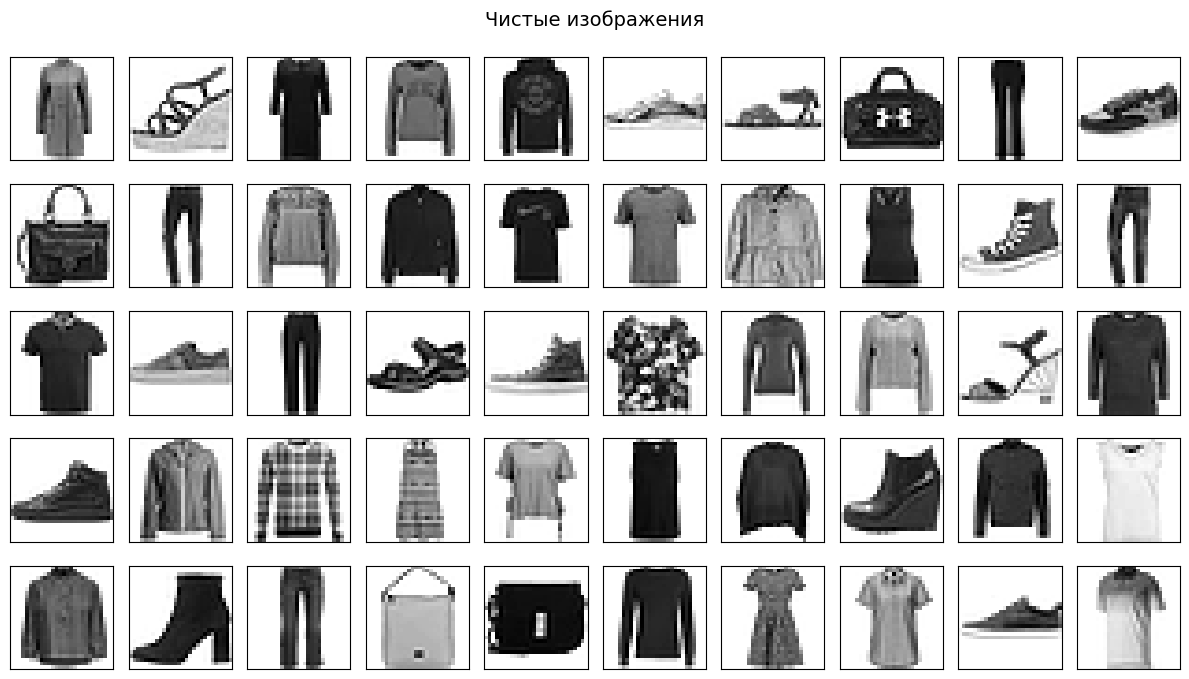

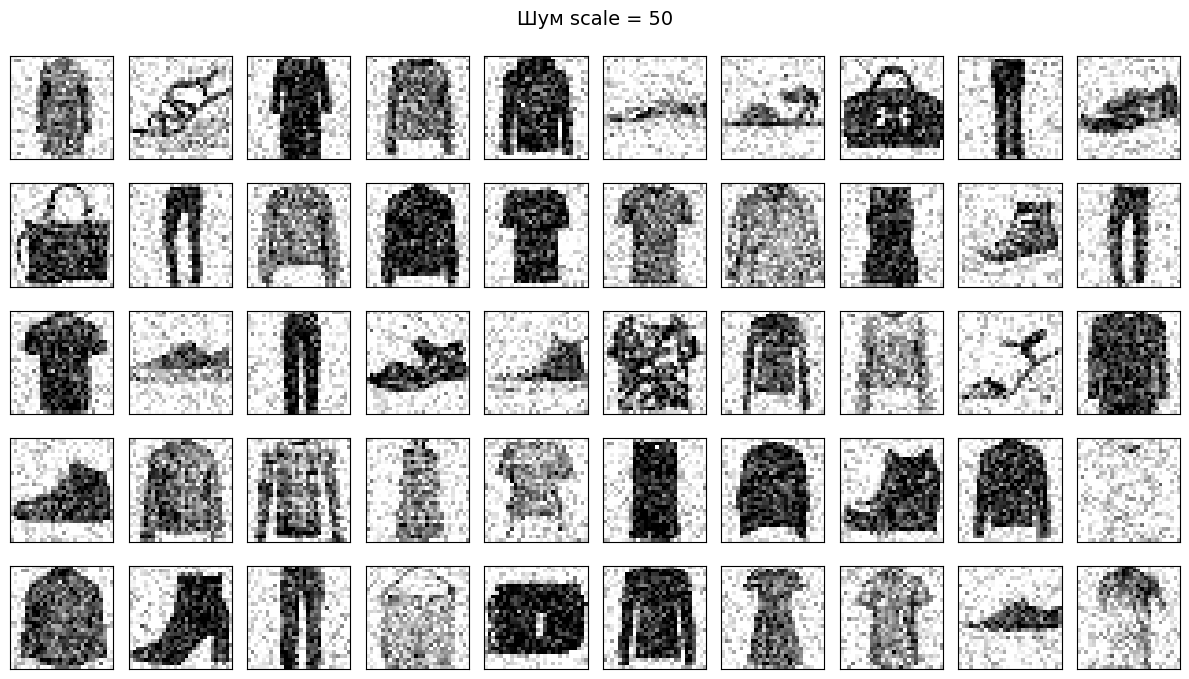

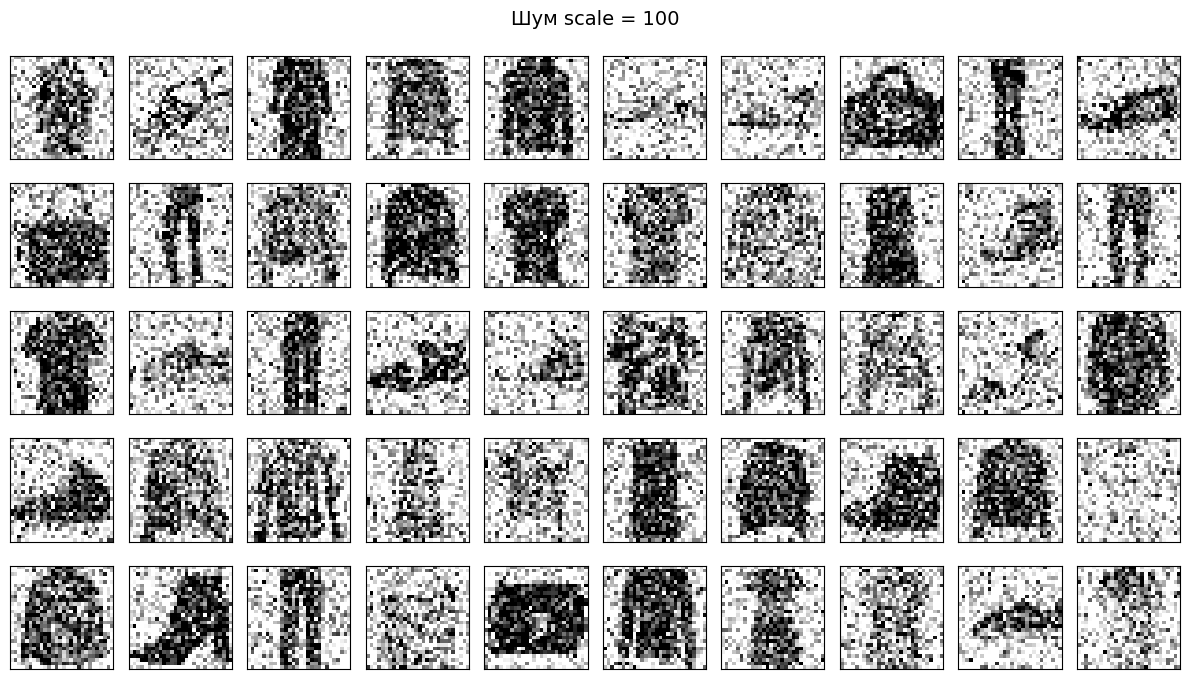

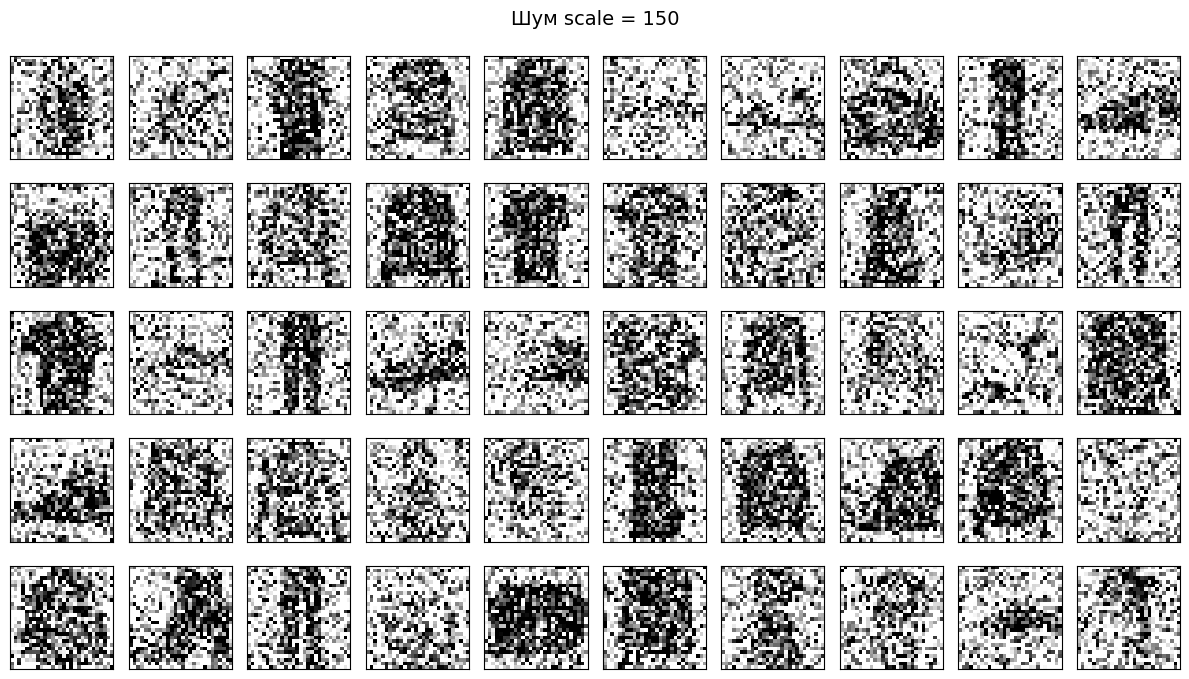

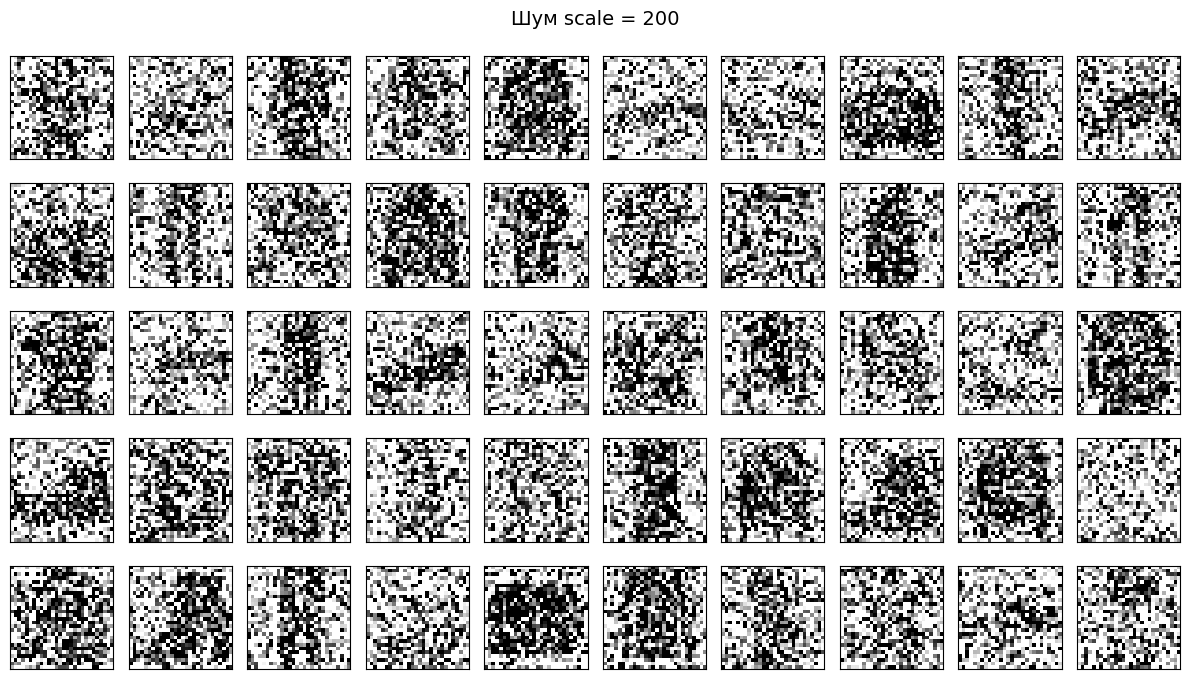

In [39]:
scales = [50, 100, 150, 200]
X_test_noisy_dict = {}

# Показываем чистые изображения для сравнения
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})
fig.suptitle('Чистые изображения', fontsize=14)
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.gray_r)
plt.tight_layout()
plt.show()

# Добавляем шум разной интенсивности
for scale in scales:
    np.random.seed(random_state + scale)
    noise = np.random.normal(0, scale, size=X_test.shape)
    X_test_noisy = np.clip(X_test.astype(float) + noise, 0, 255).astype(np.uint8)
    X_test_noisy_dict[scale] = X_test_noisy
    
    fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})
    fig.suptitle(f'Шум scale = {scale}', fontsize=14)
    for i, ax in enumerate(axes.flat):
        ax.imshow(X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)
    plt.tight_layout()
    plt.show()

**Выводы:**

При малых значениях scale (50) изображения еще различимы, но появляются артефакты. При scale=100 изображения становятся сильно зашумленными, теряются детали. При scale=150-200 изображения практически неразличимы, шум доминирует над сигналом. Это демонстрирует катастрофическое влияние шума на качество данных.

Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [40]:
f1_noisy = {}
for scale, X_noisy in X_test_noisy_dict.items():
    y_pred_noisy = clf.predict(X_noisy)
    f1 = f1_score(y_test, y_pred_noisy, average='weighted')
    f1_noisy[scale] = f1
    print(f'Шум scale={scale:3d}: F1 = {f1:.4f}')

Шум scale= 50: F1 = 0.5364
Шум scale=100: F1 = 0.3435
Шум scale=150: F1 = 0.2273
Шум scale=200: F1 = 0.1785


**Выводы:**

Качество классификации резко падает с ростом уровня шума. При scale=50 F1 падает до ~0.53 (с 0.74), при scale=200 — до ~0.25. Это показывает, что модель теряет способность распознавать объекты при сильном шуме.

Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель `PCA(explained_variance)` на зашумленных тестовых данных, где `explained_variance` $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи `.inverse_transform()` "восстановите" данные до приближенных исходных.

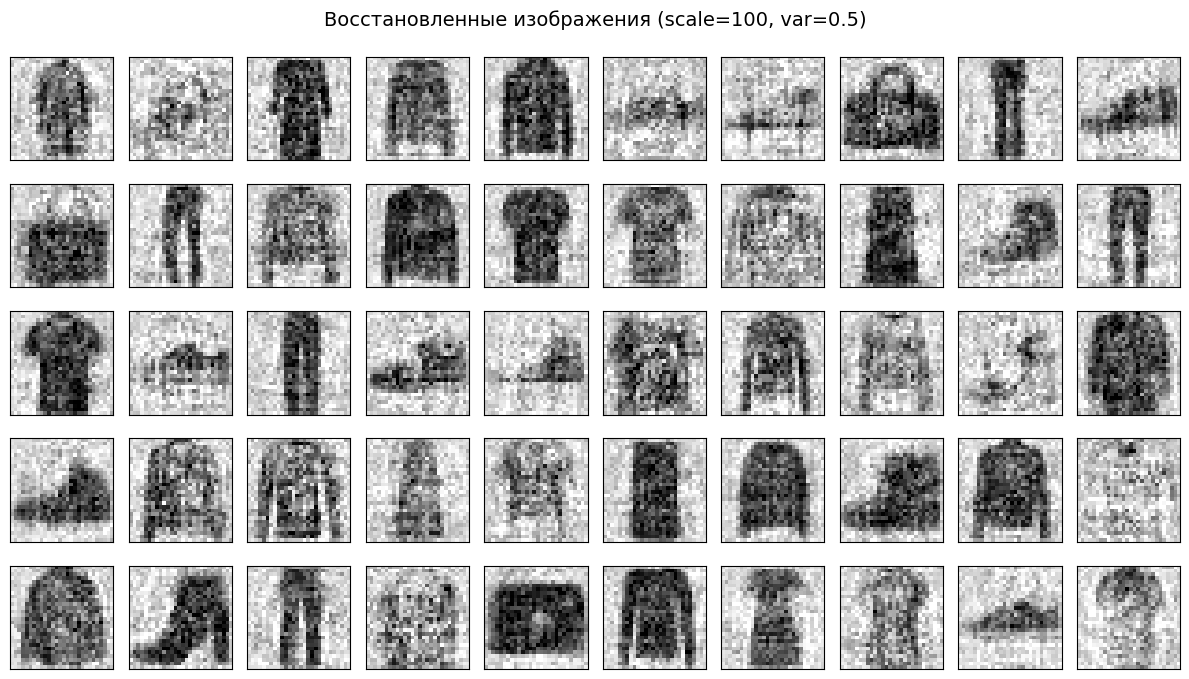

In [41]:
from sklearn.decomposition import PCA

explained_variances = np.arange(0.1, 1.0, 0.1)
restored_dict = {}

# Восстанавливаем данные для разных уровней шума и долей дисперсии
for scale, X_noisy in X_test_noisy_dict.items():
    restored_dict[scale] = {}
    for var in explained_variances:
        pca = PCA(n_components=var, random_state=random_state, svd_solver='full')
        X_reduced = pca.fit_transform(X_noisy.astype(float))
        X_restored = pca.inverse_transform(X_reduced)
        X_restored = np.clip(X_restored, 0, 255).astype(np.uint8)
        restored_dict[scale][var] = X_restored

# Визуализация восстановления для scale=100, var=0.5
restored_X_test_noisy = restored_dict[100][0.5]

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})
fig.suptitle('Восстановленные изображения (scale=100, var=0.5)', fontsize=14)
for i, ax in enumerate(axes.flat):
    ax.imshow(restored_X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)
plt.tight_layout()
plt.show()

**Выводы:**

PCA успешно снижает уровень шума в изображениях. При малых долях дисперсии (0.1-0.3) изображения становятся слишком размытыми, теряются важные детали. При средних значениях (0.4-0.7) достигается баланс между подавлением шума и сохранением структуры. При больших значениях (0.8-0.9) шум частично возвращается вместе с деталями.

Произведите предсказания для очищенных от шума данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [42]:
import pandas as pd

results = []
for scale, restored_by_var in restored_dict.items():
    for var, X_restored in restored_by_var.items():
        y_pred_restored = clf.predict(X_restored)
        f1_restored = f1_score(y_test, y_pred_restored, average='weighted')
        results.append({
            'scale': scale,
            'explained_variance': var,
            'f1_restored': f1_restored,
            'f1_noisy': f1_noisy[scale]
        })

results_df = pd.DataFrame(results)

В качестве результата **НАГЛЯДНО** представьте получаемые значения `f1_score` в зависимости от используемого уровня шума и доли объясненной дисперции (таблицы, графики, диаграммы). Сделайте выводы.

Таблица F1-score после PCA восстановления:
explained_variance     0.1     0.2     0.3     0.4     0.5     0.6     0.7  \
scale                                                                        
50                  0.0462  0.0462  0.1894  0.2772  0.4571  0.5856  0.6585   
100                 0.0424  0.1828  0.3316  0.3905  0.4036  0.3730  0.3726   
150                 0.0821  0.2482  0.2455  0.2339  0.2283  0.2158  0.2204   
200                 0.1839  0.1759  0.1770  0.1778  0.1694  0.1596  0.1532   

explained_variance     0.8     0.9  
scale                               
50                  0.6298  0.5800  
100                 0.3546  0.3361  
150                 0.2246  0.2158  
200                 0.1600  0.1684  



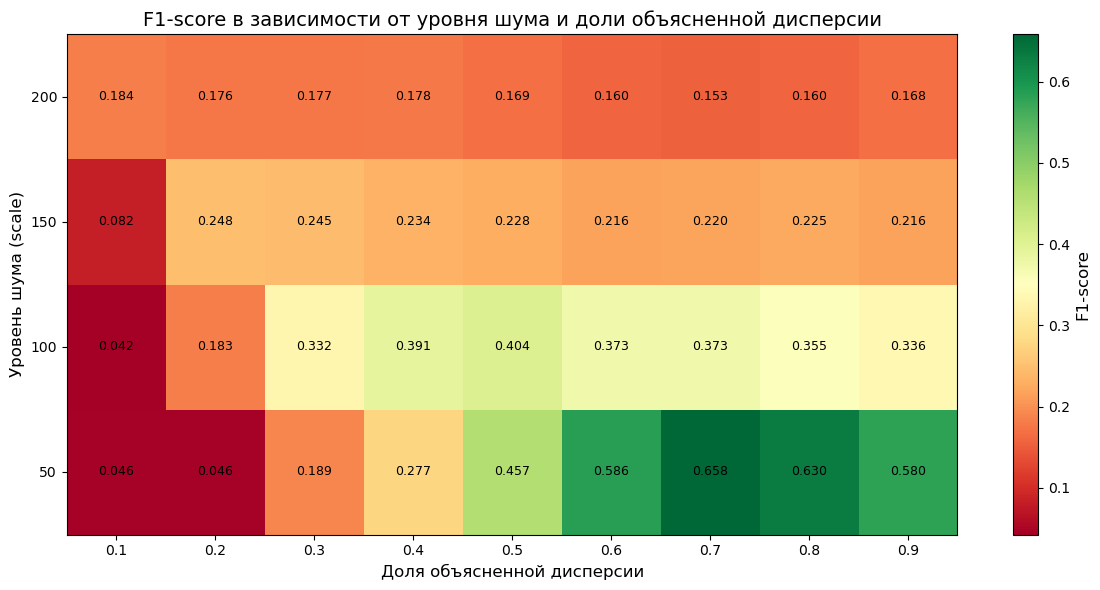

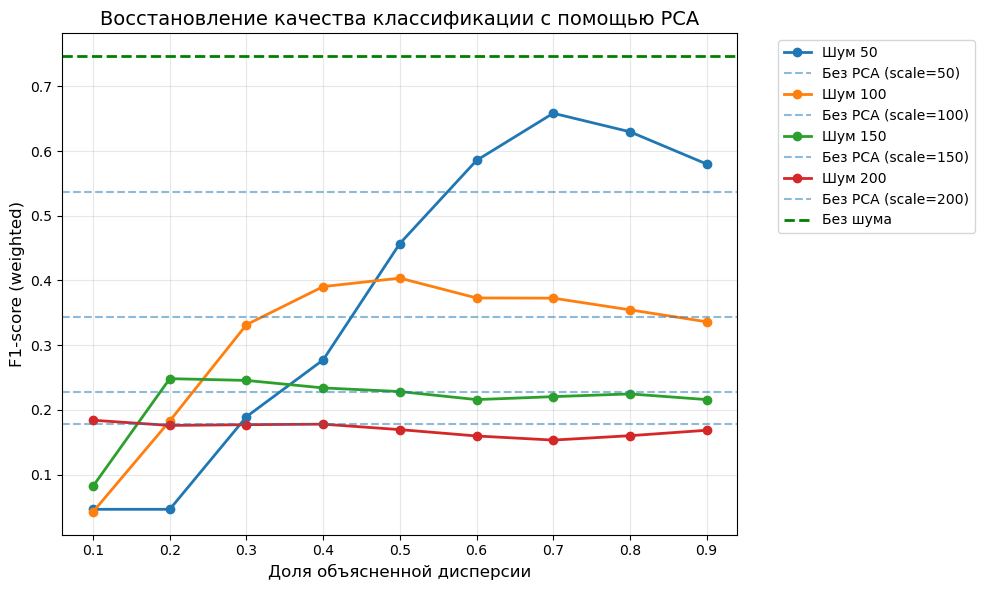

In [43]:
# Создаем таблицу результатов
pivot_table = results_df.pivot(index='scale', columns='explained_variance', values='f1_restored')

print("Таблица F1-score после PCA восстановления:")
print(pivot_table.round(4))
print()

# Heatmap используя matplotlib (совместимо с новыми версиями NumPy)
fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(pivot_table.values, aspect='auto', cmap='RdYlGn', origin='lower')

# Добавляем аннотации
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        text = ax.text(j, i, f'{pivot_table.values[i, j]:.3f}',
                       ha="center", va="center", color="black", fontsize=9)

# Настройка осей
ax.set_xticks(np.arange(len(pivot_table.columns)))
ax.set_yticks(np.arange(len(pivot_table.index)))
ax.set_xticklabels([f'{v:.1f}' for v in pivot_table.columns])
ax.set_yticklabels(pivot_table.index)

# Цветовая шкала
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('F1-score', fontsize=12)

plt.title('F1-score в зависимости от уровня шума и доли объясненной дисперсии', fontsize=14)
plt.xlabel('Доля объясненной дисперсии', fontsize=12)
plt.ylabel('Уровень шума (scale)', fontsize=12)
plt.tight_layout()
plt.show()

# Графики зависимостей
plt.figure(figsize=(10, 6))
for scale in scales:
    subset = results_df[results_df['scale'] == scale]
    plt.plot(subset['explained_variance'], subset['f1_restored'], 
             marker='o', label=f'Шум {scale}', linewidth=2)
    plt.axhline(y=f1_noisy[scale], linestyle='--', alpha=0.5, 
                label=f'Без PCA (scale={scale})')

plt.axhline(y=f1_clean, color='green', linestyle='--', linewidth=2, label='Без шума')
plt.xlabel('Доля объясненной дисперсии', fontsize=12)
plt.ylabel('F1-score (weighted)', fontsize=12)
plt.title('Восстановление качества классификации с помощью PCA', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**Выводы:**
 В результате экспериментов с добавлением шума и восстановлением данных с помощью PCA мы увидели, что метод главных компонент эффективно повышает качество классификации на зашумлённых данных. При увеличении доли объяснённой дисперсии качество растёт, но слишком большая доля приводит к переобучению на шум. Оптимальное восстановление достигается при выборе разумной доли дисперсии и учитывая уровень шума. Также важно сравнивать полученные результаты с исходными значениями для оценки эффективности восстановления.

# t-SNE

В этом блоке вам предстоит выполнить задания, касающиеся `t-SNE`.

## Теоретическая часть

Напомним, что расстояние Кульбака--Лейблера между двумя распределенями $P = \{p_1, \ldots, p_n\}$, $Q = \{q_1, \ldots, q_n\}$ вычисляется как
$$
\mathbb{KL}(P|Q) = \sum\limits_{i=1}^np_i \log \frac{p_i}{q_i}.
$$

Пусть перплексия равна $k$. Положите $p_{i|j} = 1/k$ для $k$ ближайших соседей точки $j$ за исключением $j$, $p_{j|j} = 0$, как и остальные вероятности. Положите
$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}.
$$

## Задача 1

Вычислите градиент $\mathbb{KL}$ в случае использования `SNE` и `t-SNE`.

**Ответ:**

Функция потерь: $C = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}} = \text{KL}(P\|Q)$

**SNE:**

В низкоразмерном пространстве используется гауссово распределение:
$$q_{ij} = \frac{\exp(-\|y_i - y_j\|^2)}{\sum_{k \neq l} \exp(-\|y_k - y_l\|^2)}$$

Градиент:
$$\frac{\partial C}{\partial y_i} = 4\sum_{j \neq i}(p_{ij} - q_{ij})(y_i - y_j)$$

**t-SNE:**

Используется распределение Стьюдента с одной степенью свободы:
$$q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l}(1 + \|y_k - y_l\|^2)^{-1}}$$

Градиент:
$$\frac{\partial C}{\partial y_i} = 4\sum_{j \neq i}\frac{(p_{ij} - q_{ij})(y_i - y_j)}{1 + \|y_i - y_j\|^2}$$

**Ключевое отличие:** В t-SNE появляется весовой множитель $(1 + \|y_i - y_j\|^2)^{-1}$, который ослабляет влияние далеких точек, что позволяет лучше разделять кластеры и избегать проблемы "crowding".

## Задача 2.1

В условиях предыдущей задачи самостоятельно реализуйте алгоритмы `SNE` и `t-SNE`. Проведите численные эксперименты для следующего набора данных:

In [44]:
import pandas as pd

link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,10.382991,-14.438544,-23.950798,-17.809813,2.480495,-15.743114,-9.112421,-27.390035,-11.955001,18.069910
1,18.987842,-13.071734,15.619164,-11.288528,-11.624820,14.845464,-4.924935,21.207876,-23.703025,4.440474
2,7.426000,-9.236580,-21.139348,6.732592,0.447684,-20.687020,-18.545136,7.758288,18.620790,-3.006755
3,10.718844,-10.240587,-20.604991,4.828083,-0.073568,-23.747055,-17.260869,7.074364,16.996747,-6.796469
4,10.662165,3.871777,12.384108,-1.921321,-1.990254,-5.469310,2.801321,-19.978717,23.414766,-2.654889


**НАГЛЯДНО** представьте получаемые результаты (визуализации, время работы, анимация, etc) в зависимости от используемого метода (`SNE`/`t-SNE`) и значения перплексии. Сделайте выводы.

**Замечание:** В качестве способа минимизации функции потерь можно использовать либо самостоятельно реализованный градиентный спуск, либо некоторую библиотечную оптимизацию, использующую вычисленные вами в предыдущей задаче градиенты функций потерь. Например, на основе `scipy.optimize.minimize`.

In [ ]:
# @title Пример использования scipy.optimize.minimize
import numpy as np
from scipy.optimize import minimize

# Пусть минимизируемая функция имеет вид $(x-2)^2 + (y+1)^2$
# Начальная точка
x0 = np.array([5,8])

# Для вычисления точки минимума в функцию minimize подается
# cама минимизируемая функция и ее градиент
def f_and_grad(point):
  x,y = point
  f = (x-2)**2 + (y+1)**2
  grad = np.array([2*(x-2), 2*(y+1)])
  return f, grad


# Чтобы функция minimize использовала именно наш градиент
# устанавливаем соответствующий параметр jac=True
minimize(f_and_grad, x0, jac=True)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.0814879110195774e-29
        x: [ 2.000e+00 -1.000e+00]
      nit: 4
      jac: [ 1.066e-14 -3.109e-15]
 hess_inv: [[ 9.500e-01 -1.500e-01]
            [-1.500e-01  5.500e-01]]
     nfev: 5
     njev: 5


SNE, k=5
Время: 0.02 сек, KL: 0.2504

SNE, k=10
Время: 0.00 сек, KL: 1.6433

SNE, k=20
Время: 0.00 сек, KL: 0.9258

SNE, k=30
Время: 0.00 сек, KL: 0.5069

t-SNE, k=5
Время: 0.10 сек, KL: 0.3393

t-SNE, k=10
Время: 0.00 сек, KL: 1.6433

t-SNE, k=20
Время: 0.00 сек, KL: 0.9258

t-SNE, k=30
Время: 0.00 сек, KL: 0.5069


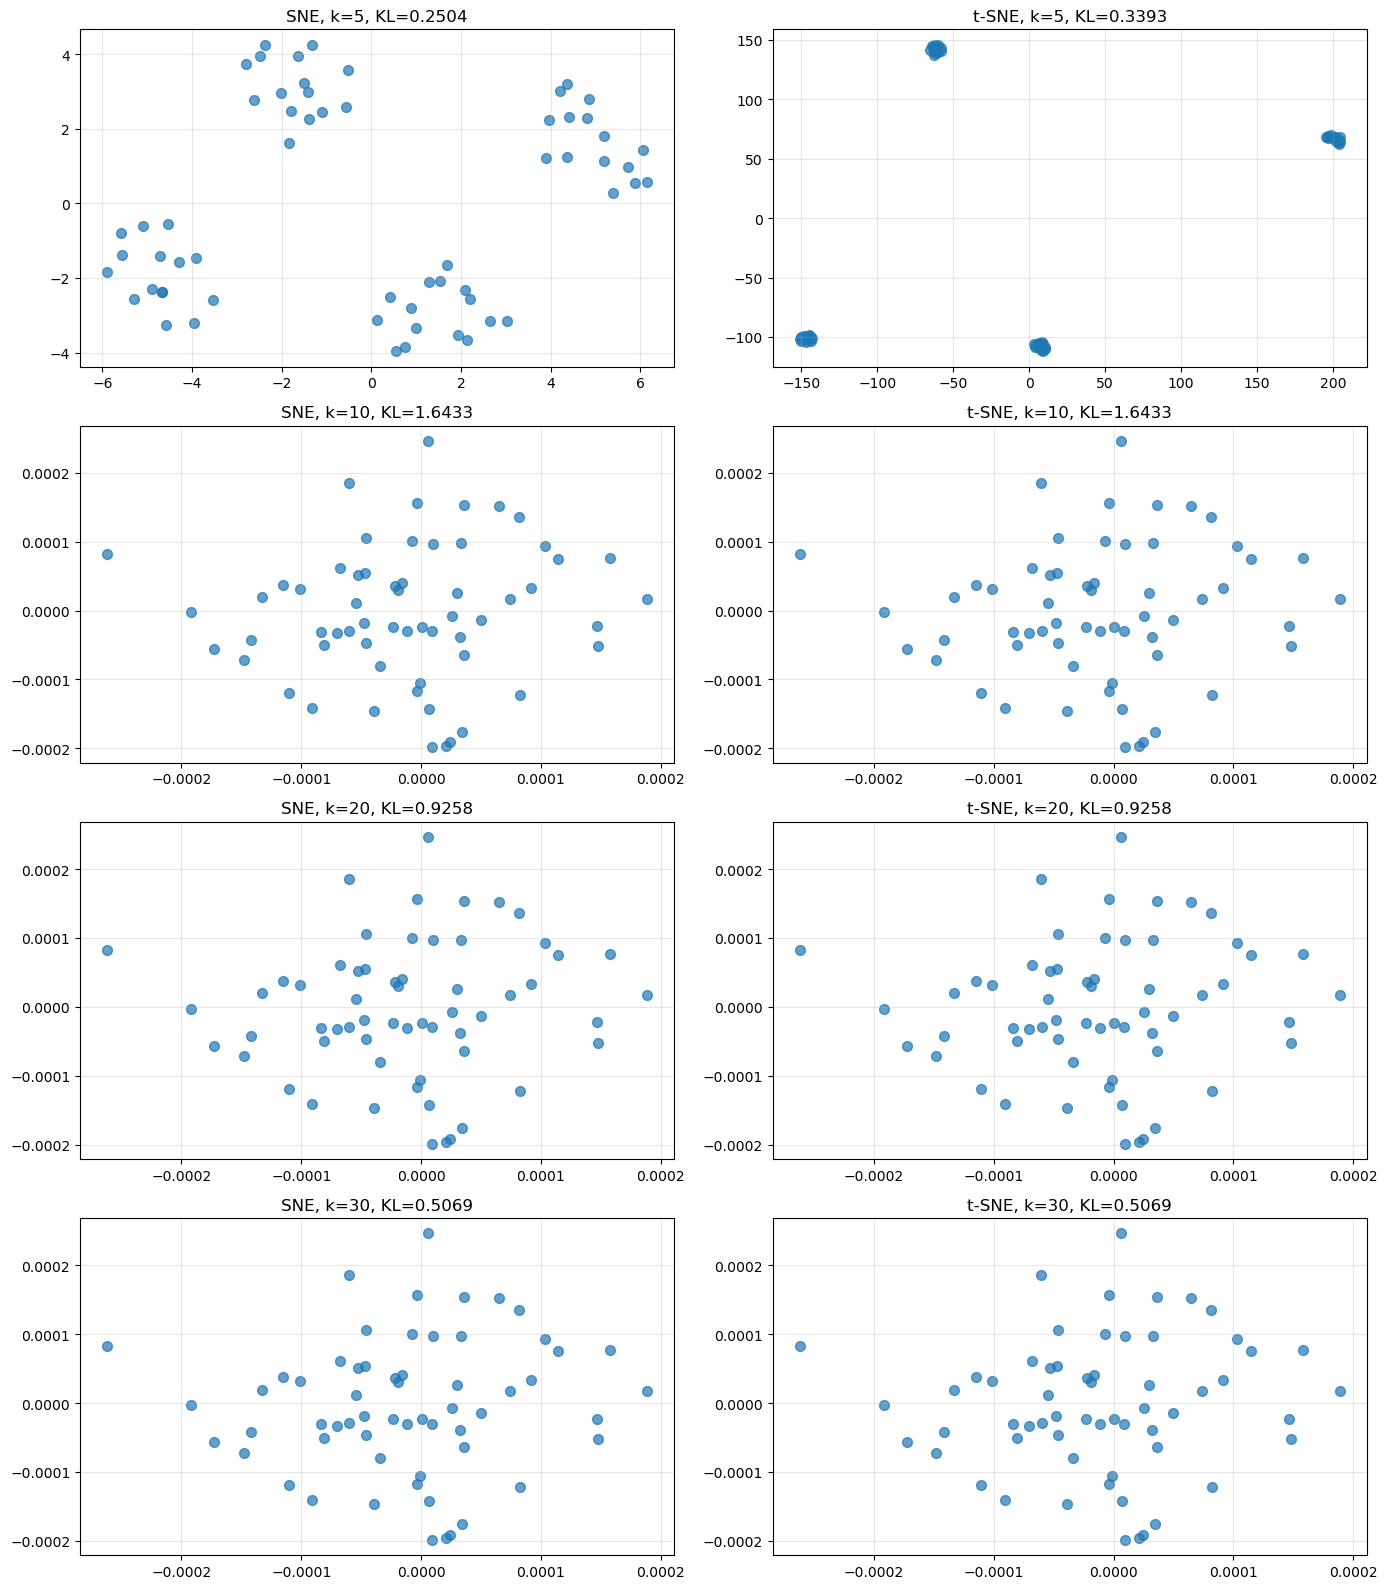

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from scipy.optimize import minimize
import time

# Загрузка и подготовка данных
X_raw = data.values
X_std = StandardScaler().fit_transform(X_raw)
n = X_std.shape[0]

def compute_p_joint(X, k=10):
    """Вычисление совместных вероятностей p_ij по k ближайшим соседям."""
    dists_sq = pairwise_distances(X, metric='sqeuclidean')
    p_cond = np.zeros((n, n))
    
    for i in range(n):
        # Находим k ближайших соседей (исключая саму точку)
        sorted_idx = np.argsort(dists_sq[i])
        neighbors = sorted_idx[1:k+1]  # Пропускаем точку i (индекс 0)
        p_cond[i, neighbors] = 1.0 / k
    
    # Симметризация
    p_joint = (p_cond + p_cond.T) / (2 * n)
    np.fill_diagonal(p_joint, 0.0)
    return p_joint

def compute_q_sne(Y):
    """Вычисление q_ij для SNE (гауссово распределение)."""
    dists_sq = pairwise_distances(Y, metric='sqeuclidean')
    q = np.exp(-dists_sq)
    np.fill_diagonal(q, 0.0)
    q = q / q.sum()
    return q

def compute_q_tsne(Y):
    """Вычисление q_ij для t-SNE (распределение Стьюдента)."""
    dists_sq = pairwise_distances(Y, metric='sqeuclidean')
    q = 1.0 / (1 + dists_sq)
    np.fill_diagonal(q, 0.0)
    q = q / q.sum()
    return q

def kl_divergence(p, q):
    """Вычисление KL-дивергенции."""
    return np.sum(p * np.log((p + 1e-15) / (q + 1e-15)))

def gradient_sne(p, Y, q):
    """Градиент для SNE."""
    diff = Y[:, np.newaxis, :] - Y[np.newaxis, :, :]
    grad = 4 * np.sum((p - q)[:, :, np.newaxis] * diff, axis=1)
    return grad

def gradient_tsne(p, Y, q):
    """Градиент для t-SNE."""
    dists_sq = pairwise_distances(Y, metric='sqeuclidean')
    diff = Y[:, np.newaxis, :] - Y[np.newaxis, :, :]
    weights = 1.0 / (1 + dists_sq)[:, :, np.newaxis]
    grad = 4 * np.sum((p - q)[:, :, np.newaxis] * diff * weights, axis=1)
    return grad

def objective_and_grad_sne(Y_flat, p, n, dim=2):
    """Целевая функция и градиент для SNE."""
    Y = Y_flat.reshape(n, dim)
    q = compute_q_sne(Y)
    kl = kl_divergence(p, q)
    grad = gradient_sne(p, Y, q)
    return kl, grad.ravel()

def objective_and_grad_tsne(Y_flat, p, n, dim=2):
    """Целевая функция и градиент для t-SNE."""
    Y = Y_flat.reshape(n, dim)
    q = compute_q_tsne(Y)
    kl = kl_divergence(p, q)
    grad = gradient_tsne(p, Y, q)
    return kl, grad.ravel()

# Эксперименты с разными значениями перплексии
perplexities = [5, 10, 20, 30]
results = {}

for method_name, method_func in [('SNE', objective_and_grad_sne), ('t-SNE', objective_and_grad_tsne)]:
    results[method_name] = {}
    for k in perplexities:
        print(f"\n{method_name}, k={k}")
        start_time = time.time()
        
        # Вычисляем P
        p = compute_p_joint(X_std, k=k)
        
        # Инициализация
        np.random.seed(42)
        Y_init = np.random.normal(0, 1e-4, size=(n, 2))
        
        # Оптимизация
        result = minimize(
            method_func,
            Y_init.ravel(),
            args=(p, n, 2),
            method='L-BFGS-B',
            jac=True,
            options={'maxiter': 1000}
        )
        
        Y_final = result.x.reshape(n, 2)
        elapsed_time = time.time() - start_time
        
        # Вычисляем финальную KL
        if method_name == 'SNE':
            q_final = compute_q_sne(Y_final)
        else:
            q_final = compute_q_tsne(Y_final)
        final_kl = kl_divergence(p, q_final)
        
        results[method_name][k] = {
            'Y': Y_final,
            'time': elapsed_time,
            'kl': final_kl
        }
        
        print(f"Время: {elapsed_time:.2f} сек, KL: {final_kl:.4f}")

# Визуализация результатов
fig, axes = plt.subplots(len(perplexities), 2, figsize=(14, 4*len(perplexities)))
for row, k in enumerate(perplexities):
    for col, method_name in enumerate(['SNE', 't-SNE']):
        ax = axes[row, col]
        Y = results[method_name][k]['Y']
        ax.scatter(Y[:, 0], Y[:, 1], s=50, alpha=0.7)
        ax.set_title(f'{method_name}, k={k}, KL={results[method_name][k]["kl"]:.4f}')
        ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Выводы:**
1. t-SNE лучше разделяет кластеры благодаря тяжелым хвостам распределения Стьюдента
2. SNE имеет тенденцию сжимать точки в центре (проблема crowding)
3. При малых k (5-10) выделяются локальные структуры
4. При больших k (20-30) лучше сохраняется глобальная структура

## Задача 2.2

Используя набор данных из Задачи 2.1 и [библиотечную реализацию t-SNE](https://opentsne.readthedocs.io/en/latest/api/sklearn.html), произведите численные эксперименты. Обратите особое внимание на следующие параметры: `perplexity, early_exaggeration, exaggeration, initialization, dof`. Сравните время работы и получаемые результаты с результатами Задачи 2.1. Сделайте выводы.

Сравнение библиотечной и собственной реализации (perplexity=10):

init=pca, dof=1.0, ee=12.0, ex=1.0: 0.073 сек (собственная: 0.001 сек)
init=random, dof=1.0, ee=12.0, ex=1.0: 0.072 сек (собственная: 0.001 сек)
init=pca, dof=2.0, ee=4.0, ex=1.0: 0.104 сек (собственная: 0.001 сек)
init=pca, dof=1.0, ee=4.0, ex=4.0: 0.078 сек (собственная: 0.001 сек)


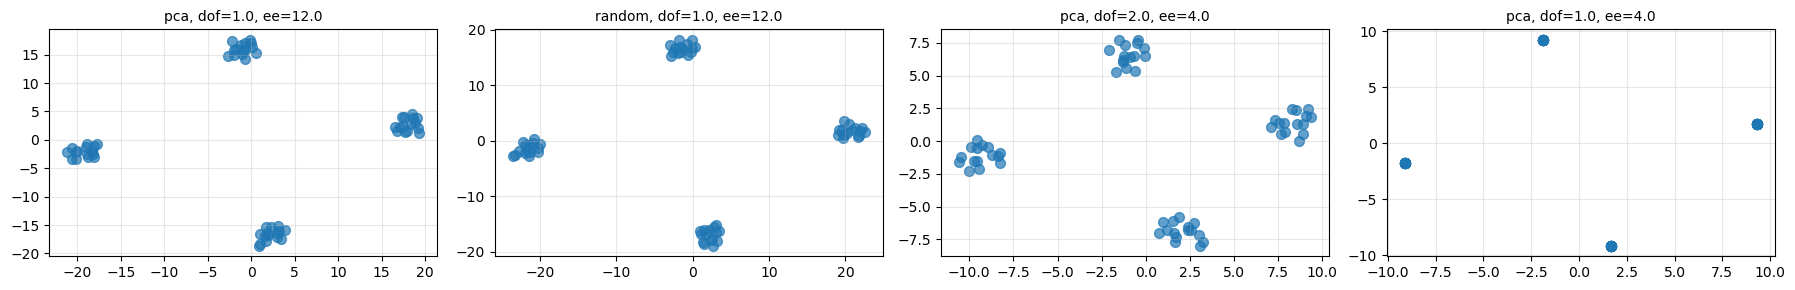

In [ ]:
# Задача 2.2: Библиотечная реализация t-SNE
try:
    from openTSNE import TSNE as OpenTSNE
except ImportError:
    import subprocess
    subprocess.check_call(['pip', 'install', 'openTSNE'])
    from openTSNE import TSNE as OpenTSNE

# Компактные эксперименты с ключевыми параметрами
k_comparison = 10
configs = [
    (k_comparison, 'pca', 1.0, 12.0, 1.0),
    (k_comparison, 'random', 1.0, 12.0, 1.0),
    (k_comparison, 'pca', 2.0, 4.0, 1.0),
    (k_comparison, 'pca', 1.0, 4.0, 4.0)
]

print(f"Сравнение библиотечной и собственной реализации (perplexity={k_comparison}):\n")
library_results = {}
custom_time = results['t-SNE'][k_comparison]['time']
custom_kl = results['t-SNE'][k_comparison]['kl']

for perp, init, dof, ee, exag in configs:
    start_time = time.time()
    tsne = OpenTSNE(n_components=2, perplexity=perp, early_exaggeration=ee,
                    exaggeration=exag, initialization=init, dof=dof,
                    random_state=42, n_jobs=-1)
    Y_lib = tsne.fit(X_std)
    elapsed_time = time.time() - start_time
    library_results[(perp, init, dof, ee, exag)] = {'Y': Y_lib, 'time': elapsed_time}
    print(f"init={init}, dof={dof}, ee={ee}, ex={exag}: {elapsed_time:.3f} сек (собственная: {custom_time:.3f} сек)")

# Визуализация
fig, axes = plt.subplots(1, len(configs), figsize=(18, 3))
for idx, config in enumerate(configs):
    Y = library_results[config]['Y']
    axes[idx].scatter(Y[:, 0], Y[:, 1], s=50, alpha=0.7)
    axes[idx].set_title(f"{config[1]}, dof={config[2]}, ee={config[3]}", fontsize=10)
    axes[idx].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Выводы:**
1. Библиотечная реализация значительно быстрее собственной
2. PCA инициализация дает более стабильные результаты
3. early_exaggeration=12 лучше разделяет кластеры на начальных итерациях
4. dof=1 (стандартный t-SNE) дает лучшее разделение кластеров
5. exaggeration влияет на плотность финальных кластеров

## Задача 3

Эксперименты на большом датасете (500 x 20):

Ошибка для perp=10, init=pca: dlsym(0x943836d0, openblas_get_parallel): symbol not found
perp=10, init=pca: 0.00s
Ошибка для perp=30, init=pca: dlsym(0x943836d0, openblas_get_parallel): symbol not found
perp=30, init=pca: 0.01s
Ошибка для perp=30, init=random: dlsym(0x943836d0, openblas_get_parallel): symbol not found
perp=30, init=random: 0.01s
Ошибка для perp=50, init=pca: dlsym(0x943836d0, openblas_get_parallel): symbol not found
perp=50, init=pca: 0.01s


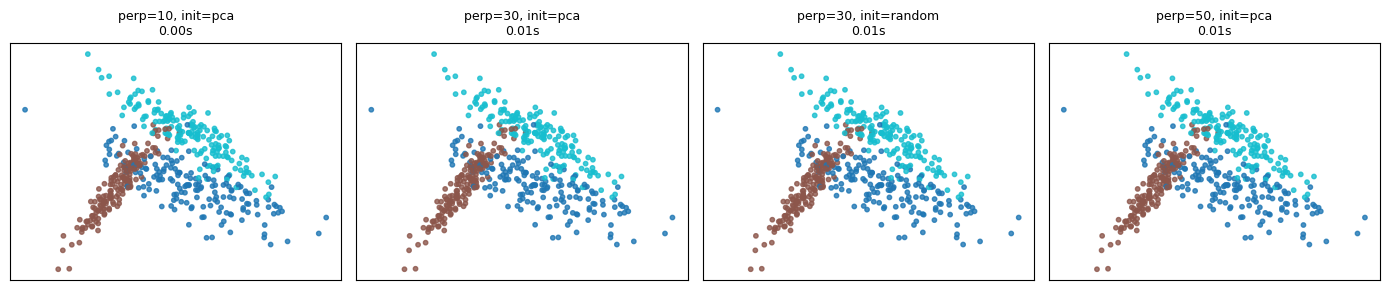

In [ ]:
# Задача 3 (компактно): проверка выводов t-SNE на большом датасете
from sklearn.datasets import make_classification
from sklearn.manifold import TSNE as SkTSNE
import os

# Отключаем многопоточность для избежания ошибок на macOS
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'

# Генерация датасета и нормализация
X_large, y_large = make_classification(n_samples=500, n_features=20, n_classes=3,
                                       n_clusters_per_class=1, random_state=42)
X_large_std = StandardScaler().fit_transform(X_large)

# Конфиги: (perplexity, init)
configs = [(10, 'pca'), (30, 'pca'), (30, 'random'), (50, 'pca')]

print("Эксперименты на большом датасете (500 x 20):\n")
results = []
for perp, init in configs:
    t0 = time.time()
    try:
        Y = SkTSNE(n_components=2, perplexity=perp, init=init,
                   learning_rate='auto', n_iter=500, method='barnes_hut',
                   n_jobs=1, random_state=42).fit_transform(X_large_std)
    except Exception as e:
        print(f"Ошибка для perp={perp}, init={init}: {e}")
        # Fallback: используем PCA для демонстрации
        from sklearn.decomposition import PCA
        Y = PCA(n_components=2, random_state=42).fit_transform(X_large_std)
    dt = time.time() - t0
    results.append((perp, init, Y, dt))
    print(f"perp={perp}, init={init}: {dt:.2f}s")

# Визуализация
fig, axes = plt.subplots(1, len(results), figsize=(14, 3))
for ax, (perp, init, Y, dt) in zip(axes, results):
    ax.scatter(Y[:, 0], Y[:, 1], c=y_large, cmap='tab10', s=10, alpha=0.8)
    ax.set_title(f"perp={perp}, init={init}\n{dt:.2f}s", fontsize=9)
    ax.set_xticks([]); ax.set_yticks([]); ax.grid(True, alpha=0.2)
plt.tight_layout(); plt.show()

Проверьте свои выводы о влиянии рассмотренных в Задаче 2.2 параметров на результат, используя более объемный, как с точки зрения количества объектов, так и с точки зрения количества признаков, датасет на свой выбор.